# Exercise 8.11

**This question uses the `Caravan` data set.**

This data set requires some preprocessing. First, I removed all rows with missing values in any variable.

In [ ]:
new_Caravan <- na.omit(Caravan)

The first 1,000 observations (i.e., the training set) of these variables have no variation, so I excluded them.

In [ ]:
summary(new_Caravan[1:1000,]$PVRAAUT)
summary(new_Caravan[1:1000,]$AVRAAUT)
new_Caravan <- new_Caravan[, -c(50,71)]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

The Purchase `variable` will be the response, so it must be numeric (0 or 1).

In [ ]:
new_Caravan$Purchase <- as.numeric(new_Caravan$Purchase)-1

## (a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [ ]:
train_index <- 1:1000
train <- new_Caravan[train_index,]
test <- new_Caravan[-train_index,]

## (b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

The ten most important predictors are as follows.

,var,rel.inf
,<chr>,<dbl>
PPERSAUT,PPERSAUT,15.382926
MKOOPKLA,MKOOPKLA,10.805140
MOPLHOOG,MOPLHOOG,7.678196
MBERMIDD,MBERMIDD,5.718581
MGODGE,MGODGE,4.953653
PBRAND,PBRAND,4.545965
MINK3045,MINK3045,4.209954
ABRAND,ABRAND,4.095361
PWAPART,PWAPART,2.736110


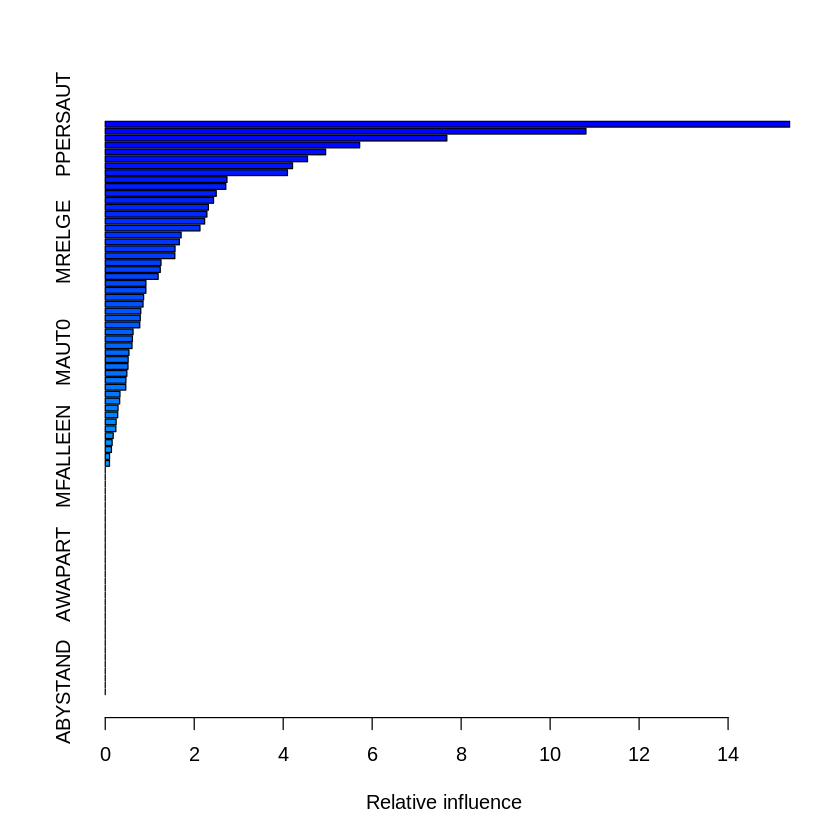

In [ ]:
gbm.fit = gbm(Purchase ~ ., data=train, distribution="bernoulli", n.trees=1000, shrinkage=0.01)
summary(gbm.fit)[1:10,]

## (c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [ ]:
gbm.prob <- predict(gbm.fit, newdata=test, type="response")
gbm.pred <- rep("No", nrow(test))
gbm.pred[gbm.prob > .2] = "Yes"

gbm.conf <- table(gbm.pred, test$Purchase)
gbm.conf
gbm.conf[4] / (gbm.conf[2] + gbm.conf[4])

Using 1000 trees...




        
gbm.pred    0    1
     No  4412  258
     Yes  121   31

[1] 0.2039474

In [ ]:
for (k in 1:10) {
    knn.pred <- knn(train=train[, -c(84)], test=test[, -c(84)], cl=train$Purchase, k=k)
    knn.conf <- table(knn.pred, test$Purchase)
    print(knn.conf)
    print(knn.conf[4] / (knn.conf[2] + knn.conf[4]))
}

        
knn.pred    0    1
       0 4261  263
       1  272   26
[1] 0.08724832
        
knn.pred    0    1
       0 4263  268
       1  270   21
[1] 0.07216495
        
knn.pred    0    1
       0 4470  280
       1   63    9
[1] 0.125
        
knn.pred    0    1
       0 4469  276
       1   64   13
[1] 0.1688312
        
knn.pred    0    1
       0 4503  285
       1   30    4
[1] 0.1176471
        
knn.pred    0    1
       0 4512  285
       1   21    4
[1] 0.16
        
knn.pred    0    1
       0 4517  287
       1   16    2
[1] 0.1111111
        
knn.pred    0    1
       0 4523  287
       1   10    2
[1] 0.1666667
        
knn.pred    0    1
       0 4527  287
       1    6    2
[1] 0.25
        
knn.pred    0    1
       0 4528  288
       1    5    1
[1] 0.1666667


In [ ]:
glm.fit <- glm(Purchase ~ ., family="binomial", data=train)
glm.prob <- predict(glm.fit, test, type="response")
glm.pred <- rep("No", nrow(test))
glm.pred[glm.prob > .2] = "Yes"

glm.conf <- table(glm.pred, test$Purchase)
glm.conf
glm.conf[4] / (glm.conf[2] + glm.conf[4])

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


        
glm.pred    0    1
     No  4183  231
     Yes  350   58

[1] 0.1421569

The precision is higher than those of KNN or logistic regression.